
## parametric methods in pandas and scipy

Pearson correlation (r) measures the linear relationship between two continuous variables.

When to use Pearson: Continuous data with normal distribution and linear relationships.

Spearman rank correlation (ρ) measures the monotonic relationship (whether the variables move in the same direction) between two variables, using ranks.


When to use Spearman: Ordinal data, or when the data does not meet Pearson's assumptions.


Ref for Parametric and Non-Parametric Analyses: https://www.analyticsvidhya.com/blog/2022/11/parametric-and-non-parametric-correlation-in-data-science/

In [ ]:
#!pip install

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import scipy
from scipy.stats.stats import pearsonr

C:\Users\zhang\AppData\Local\Temp\ipykernel_8224\3654905529.py:9: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 8,4
plt.style.use("seaborn-v0_8") # search about other styles

### The Pearson Correlation

In [3]:
# from google.colab import files
# uploaded = files.upload()
cars = pd.read_csv('mtcars.csv')
cars.columns = ['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']

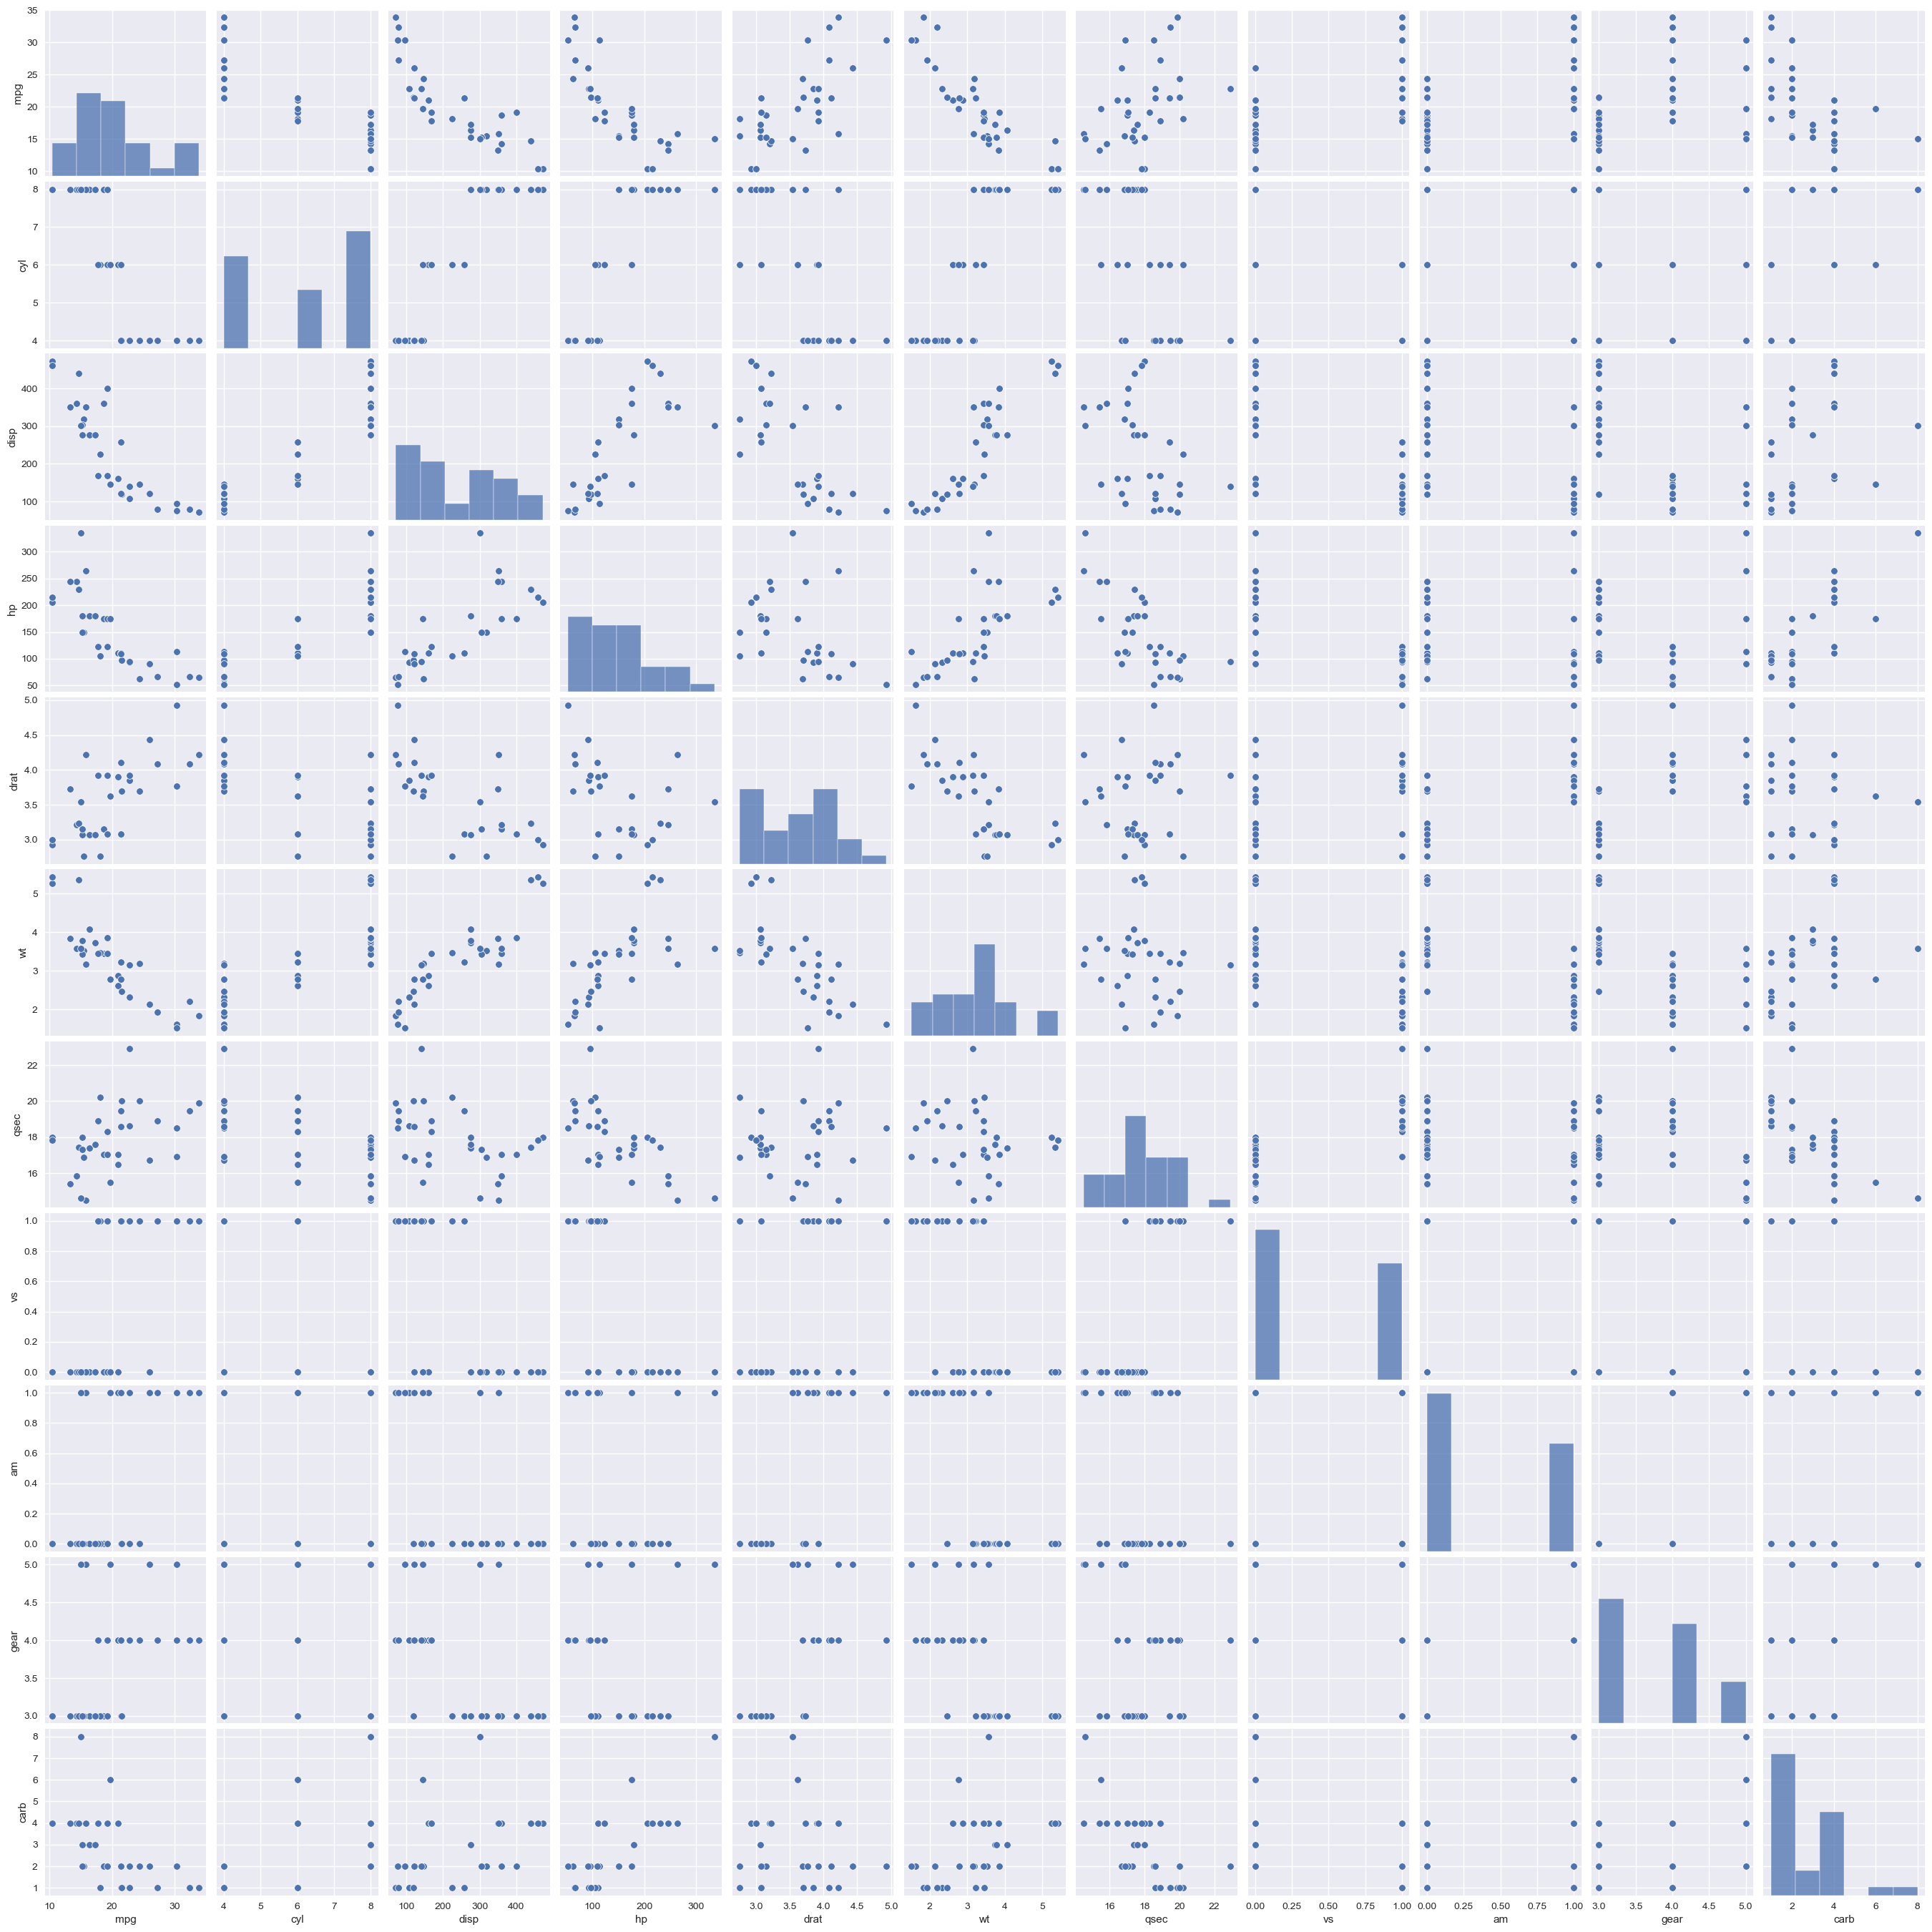

In [4]:
sb.pairplot(cars)

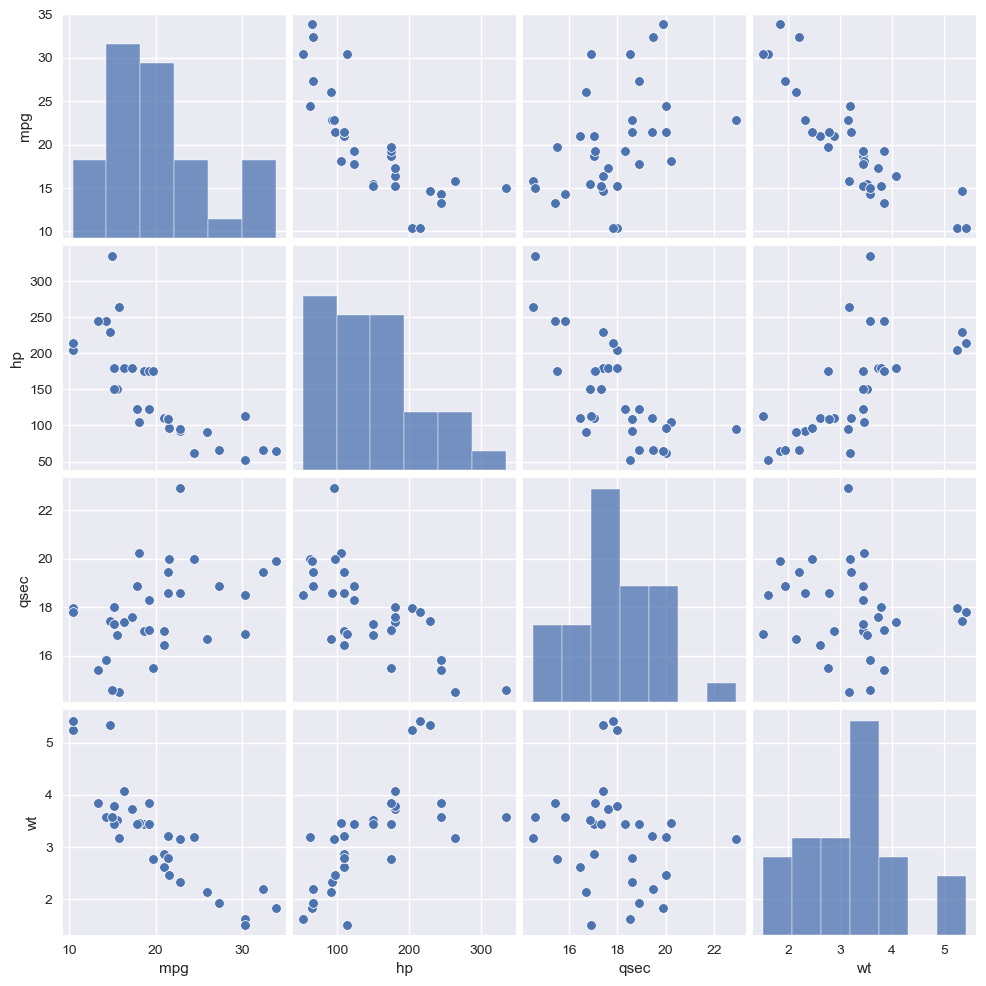

In [5]:
X = cars[['mpg', 'hp', 'qsec', 'wt']]
sb.pairplot(X)

### Using scipy to calculate the Pearson correlation coefficient

In [6]:
mpg = cars['mpg']
hp = cars['hp']
qsec = cars['qsec']
wt = cars['wt']

pearsonr_coefficient, p_value = pearsonr(mpg, hp)
print('PeasonR Correlation Coefficient %0.3f'% (pearsonr_coefficient))

PeasonR Correlation Coefficient -0.776


In [7]:
pearsonr_coefficient, p_value = pearsonr(mpg, qsec)
print('PeasonR Correlation Coefficient %0.3f'% (pearsonr_coefficient))

PeasonR Correlation Coefficient 0.419


In [8]:
pearsonr_coefficient, p_value = pearsonr(mpg, wt)
print('PeasonR Correlation Coefficient %0.3f'% (pearsonr_coefficient))

PeasonR Correlation Coefficient -0.868


### Using pandas to calculate the Pearson correlation coefficient

In [9]:
corr = X.corr()
corr

,mpg,hp,qsec,wt
mpg,1.000000,-0.776168,0.418684,-0.867659
hp,-0.776168,1.000000,-0.708223,0.658748
qsec,0.418684,-0.708223,1.000000,-0.174716
wt,-0.867659,0.658748,-0.174716,1.000000


### Using Seaborn to visualize the Pearson correlation coefficient

<Axes: >

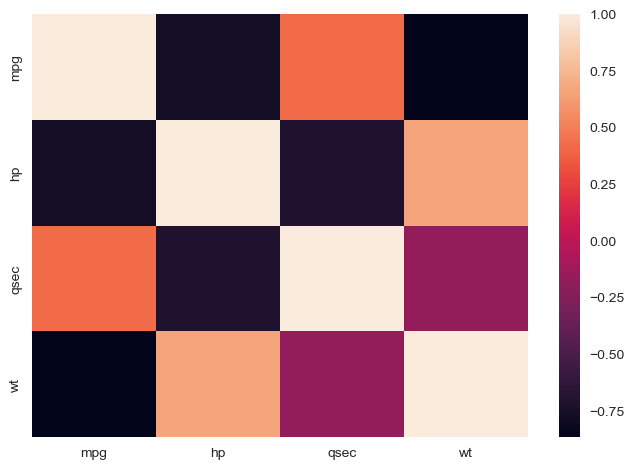

In [10]:
sb.heatmap(corr, xticklabels=corr.columns.values, yticklabels= corr.columns.values)

## class exercise:

1. Load the dataset student_scores.csv into a DataFrame.
2. Calculate Basic Summary Statistics using Pandas : mean, median, and standard deviation for the Score column.
3.Summary Statistics by Group: Group by Subject and calculate the mean, median, and standard deviation for each subject.
4.Import Scipy and Calculating Correlation using SciPy
5.Describe Method for Overall Summary.

In [11]:
df_ss = pd.read_csv('./student_scores.csv')
df_ss.head()

,Student_ID,Subject,Score
0,1,Math,78
1,2,Science,85
2,3,Math,90
3,4,English,88
4,5,Science,92


In [13]:
# Basic Summary Statistics using Pandas
score = df_ss['Score']
mean_score = score.mean()
median_score = score.median()
std_score = score.std()
print(f"Mean: {mean_score:.2f}, Median: {median_score:.2f}, Standard Deviation: {std_score:.2f}")

Mean: 85.70, Median: 86.50, Standard Deviation: 6.33


In [14]:
# Summary Statistics by Group
df_ss_grouped = df_ss.groupby("Subject").agg({
    "Score": ["mean", "median", "std"]
})
df_ss_grouped

Score                 
              mean median       std
Subject                            
English  89.000000   88.0  5.567764
Math     81.000000   79.5  6.480741
Science  88.666667   89.0  3.511885

In [16]:
# Import Scipy and Calculating Correlation using SciPy
from scipy.stats import pearsonr
# Calculating correlation between Score and StudentID
corr, p_value = pearsonr(df_ss['Score'], df_ss['Student_ID'])
print(f"Pearson Correlation Coefficient: {corr:.3f}, P-value: {p_value:.3f}")

Pearson Correlation Coefficient: 0.055, P-value: 0.880


In [17]:
df_ss.describe()

,Student_ID,Score
count,10.00000,10.000000
mean,5.50000,85.700000
std,3.02765,6.325434
min,1.00000,75.000000
25%,3.25000,81.750000
50%,5.50000,86.500000
75%,7.75000,89.750000
max,10.00000,95.000000
